## ROC Plot ##

In [1]:
# Import required modules
import sys
from pathlib import Path

In [2]:
# import project root into modules
project_root = str(Path.cwd().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.analysis import roc_plot
from src.analysis.efficiency_analysis import load_preprocessed_jobs_dataframe_from_duckdb
from src.config import enum_constants

# Automatically reload modules before executing code
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.analysis.roc_plot, src.config.enum_constants

In [10]:
# load jobs df
loaded_df = load_preprocessed_jobs_dataframe_from_duckdb(db_path="../data/slurm_data.db")

Connected to ../data/slurm_data.db
Disconnected from ../data/slurm_data.db


In [11]:
# initilize the ROCVisualizer instance
roc_instance = roc_plot.ROCVisualizer(jobs_df=loaded_df)

# clip vram_constraint_efficiency to 1

# filter out CPU-only job
filtered_df = roc_instance.filter_jobs_for_analysis(
    gpu_count_filter={"min": 0, "max": float("inf"), "inclusive": False},
    elapsed_seconds_min=0)

# calcualted dataframe with metrics
roc_instance.calculate_all_efficiency_metrics(filtered_df)



/opt/anaconda3/envs/ds4cg_unity/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'jobs_with_efficiency_metrics':             JobID  ArrayID                                           JobName  \
 20       28982142       -1                                                p3   
 21       28989215       -1               inference_user_query_review_full.sh   
 22       29004768       -1  nf-COLABFOLD_COLABFOLD_BATCH_(O64948-A0A1P8AT95)   
 23       29004931       -1  nf-COLABFOLD_COLABFOLD_BATCH_(O64948-A0A1P8AUH4)   
 24       29004942       -1      nf-COLABFOLD_COLABFOLD_BATCH_(O64948-F4K5Y4)   
 ...           ...      ...                                               ...   
 8523589  38479408       -1                           run_embed_gen_sbatch.sh   
 8523592  38479440       -1                           run_embed_gen_sbatch.sh   
 8523595  38479468       -1                           run_embed_gen_sbatch.sh   
 8523668  38469026       -1                               2M_64_15_5_4_pamnet   
 8523669  38479691       -1                                  submit_el_job.sh

### Threshold: alloc_vram_efficiency ###

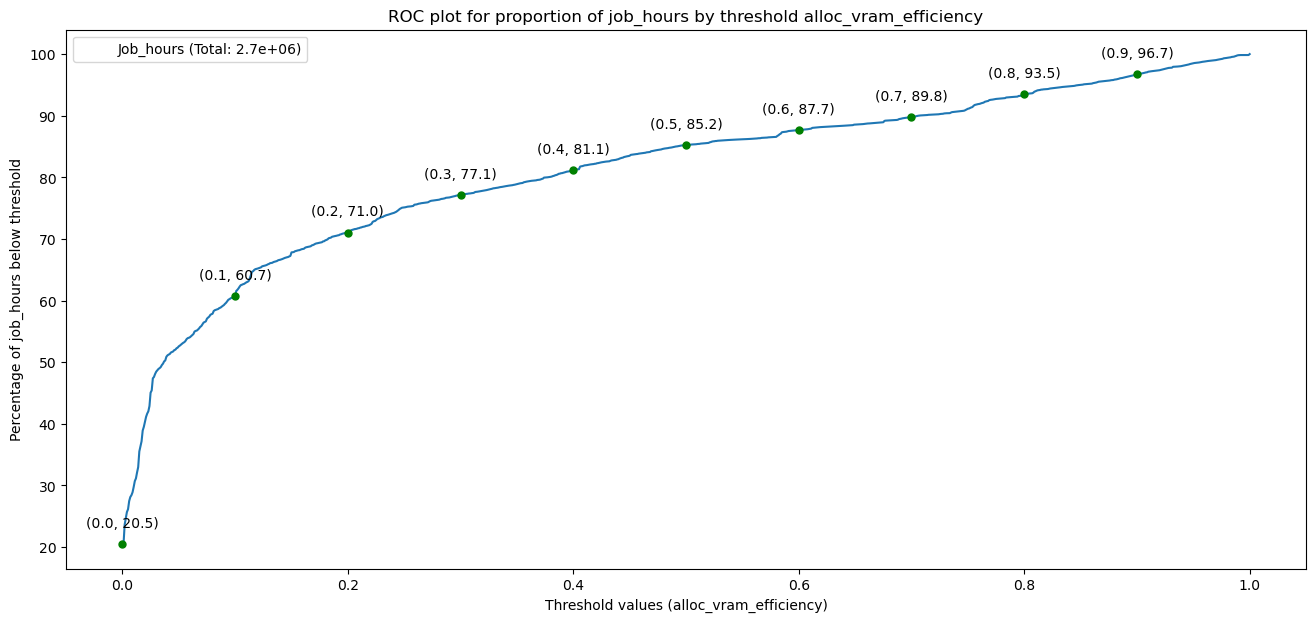

In [97]:
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)

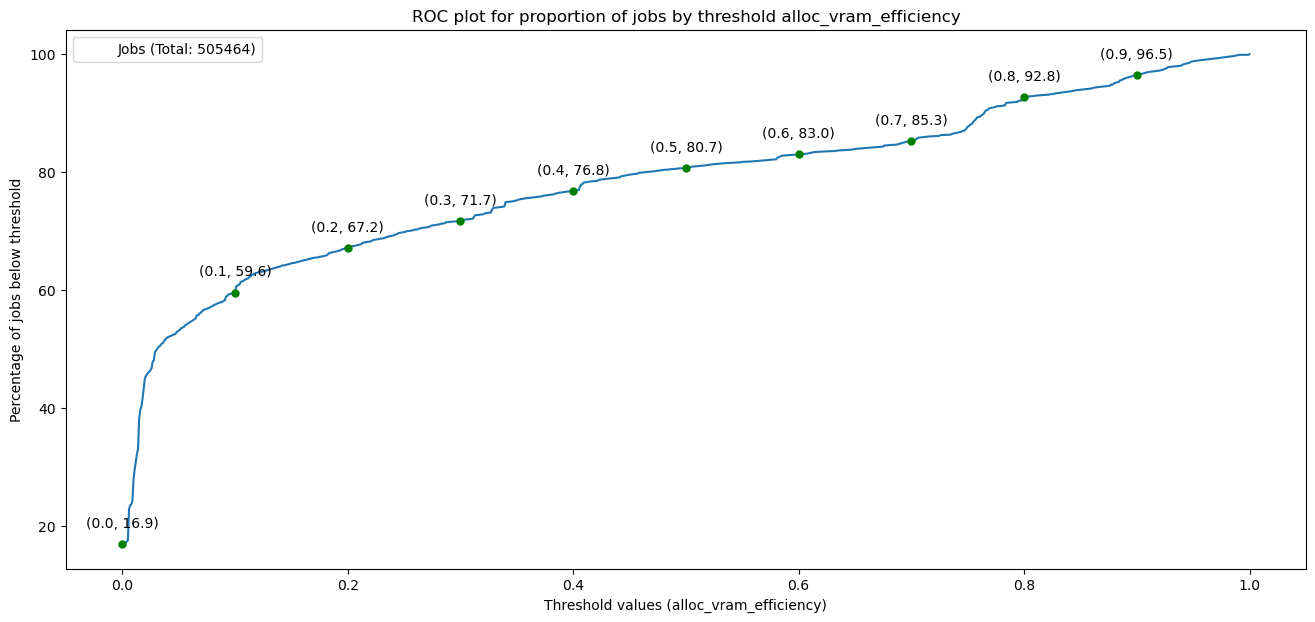

In [98]:
# plot number of jobs by percentage with regard to alloc_vram_effificient
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

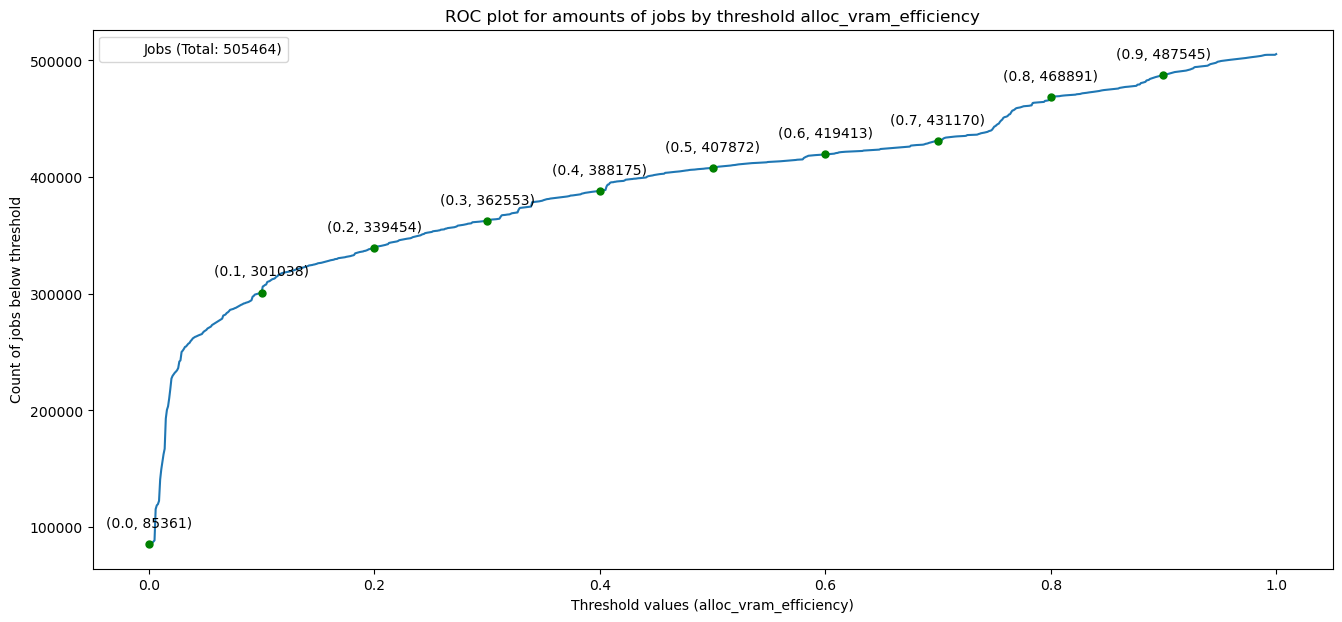

In [99]:
# plot raw numbers of jobs
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

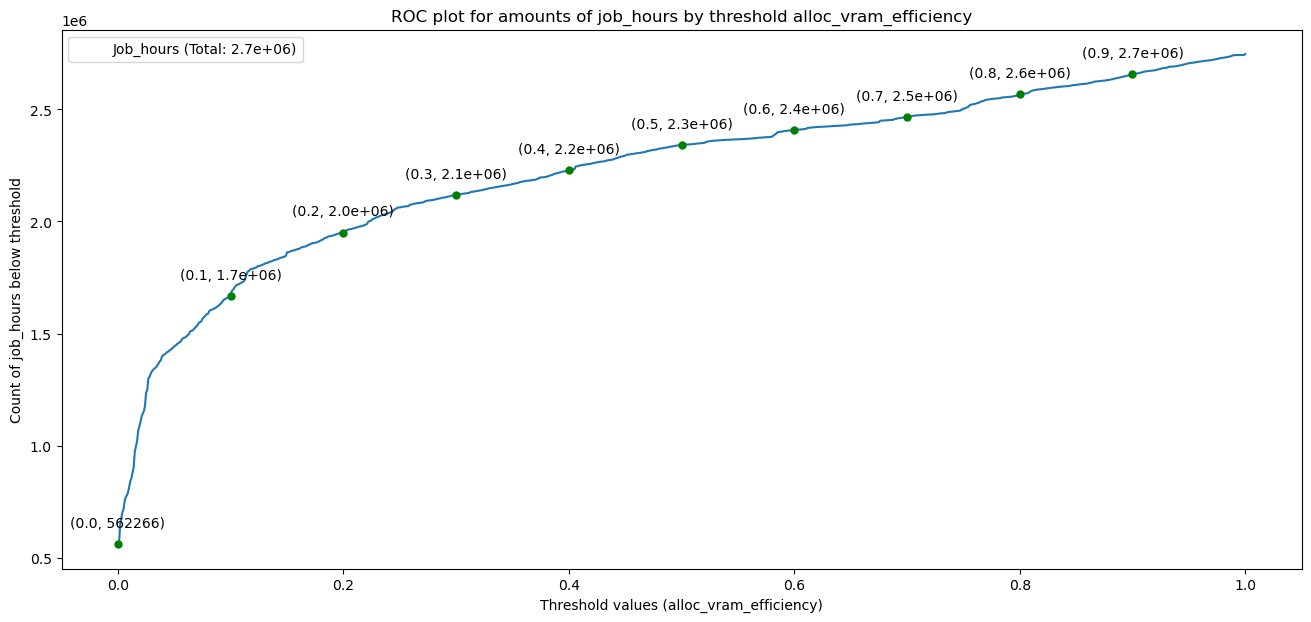

In [100]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Threshold : vram_constraints_efficiency ###

In [12]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
df = roc_instance.jobs_with_efficiency_metrics
len(df[df[threshold_metric.value].isna()])

748843

Filtered out 748843 invalid records based on vram_constraint_efficiency column.


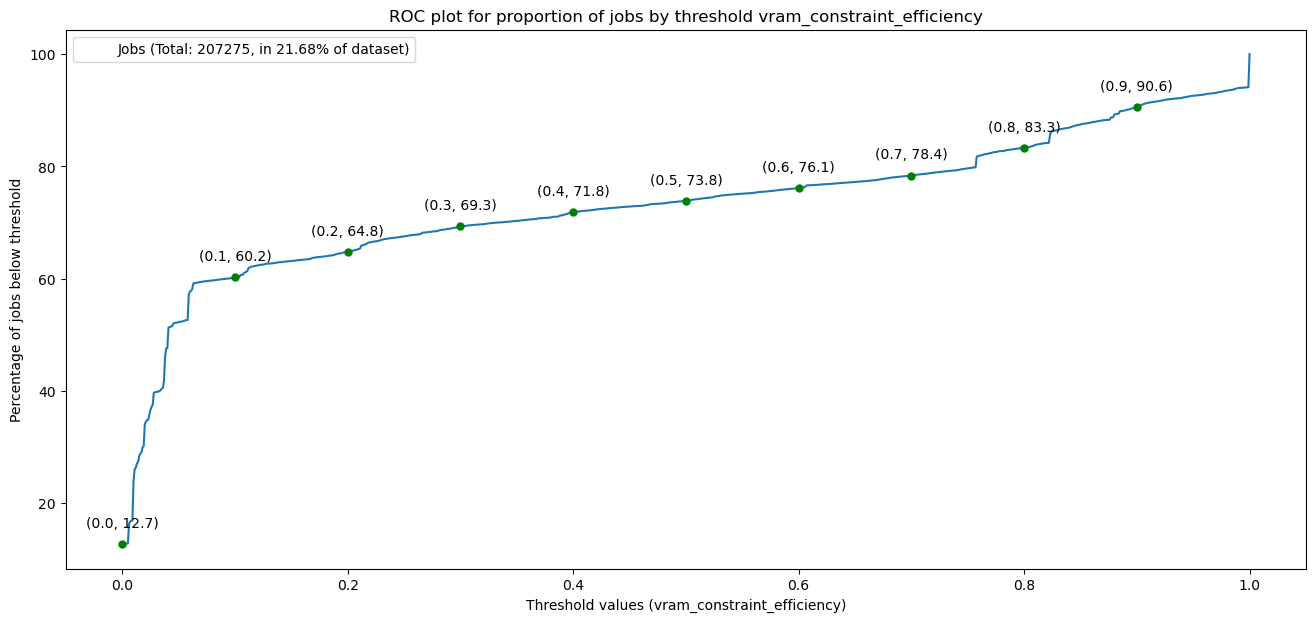

In [17]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric,
    clip_threshold_metrics=(True, 1.0)
)

Filtered out 379778 invalid records based on vram_constraint_efficiency column.


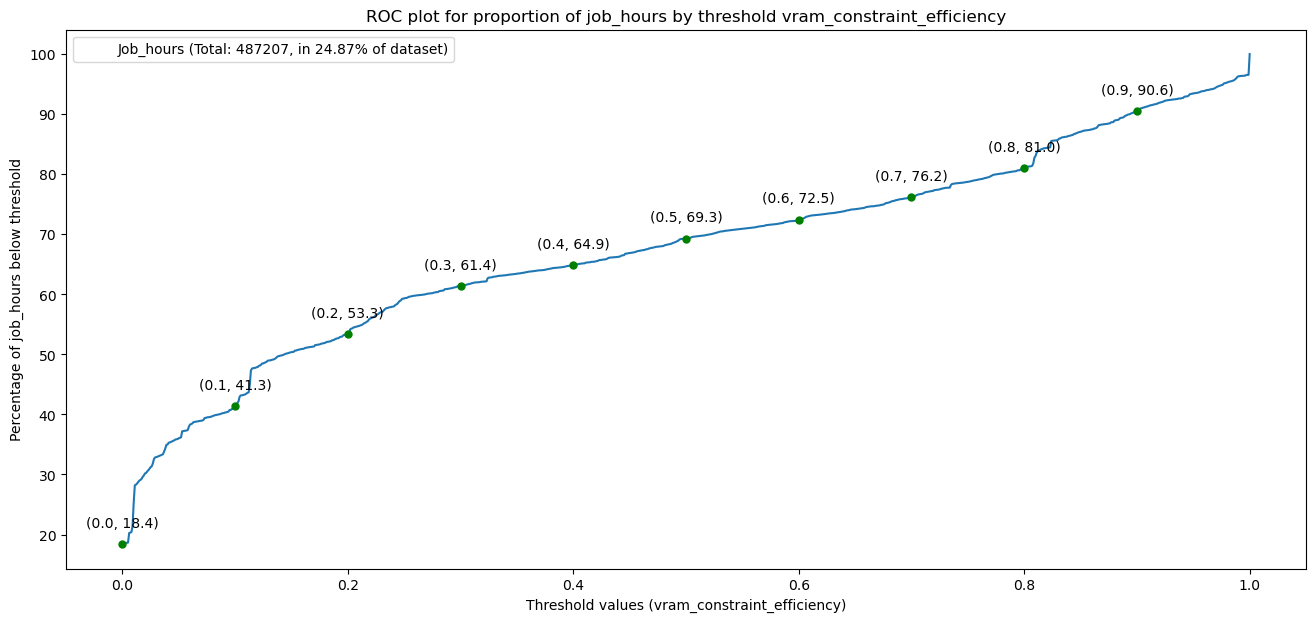

In [102]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threshold : alloc_vram_efficiency_score ###

In [103]:
# # roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")


Filtered out 85361 invalid records based on alloc_vram_efficiency_score column.
Setting min_threshold to -13304603.139441624 based on data.


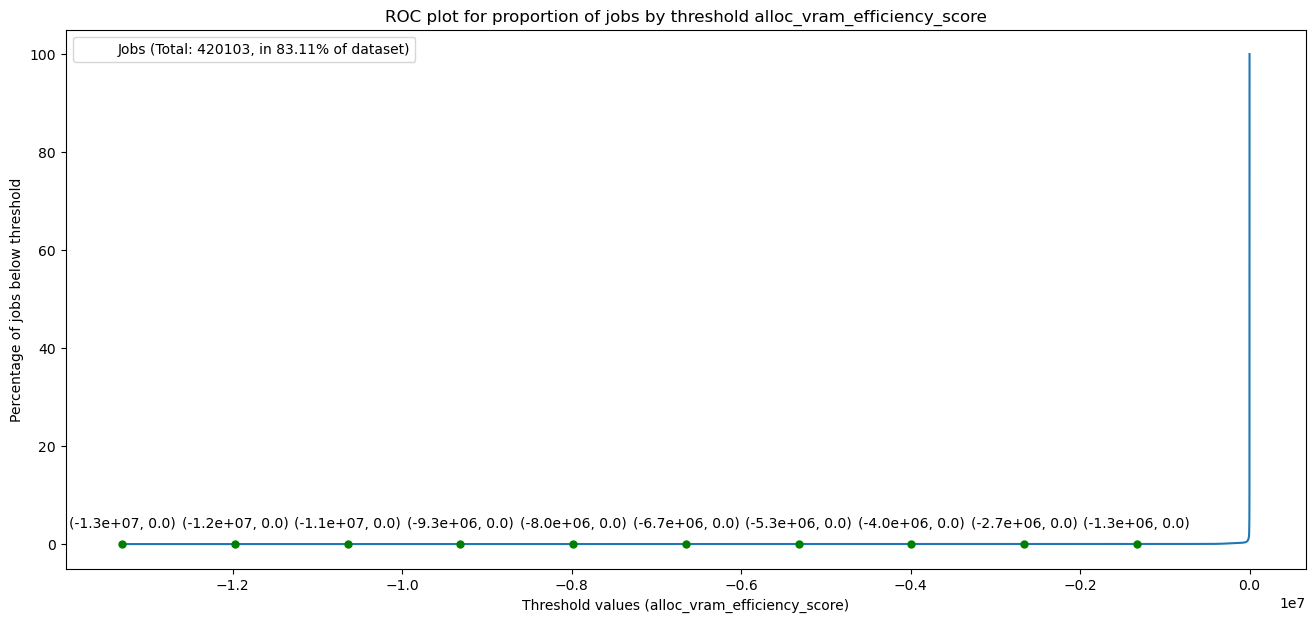

In [104]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=1000,
    # min_threshold=-10000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [105]:
print(roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].mean())
print(roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].std())
roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].max()

-inf
nan


0.0

In [106]:
temp = roc_instance.jobs_with_efficiency_metrics
temp = temp[temp[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value] > 0]
res = temp[["JobID", enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value, 
            enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY.value, "allocated_vram", "used_vram_gib"]]
res

,JobID,alloc_vram_efficiency_score,alloc_vram_efficiency,allocated_vram,used_vram_gib


Filtered out 85361 invalid records based on alloc_vram_efficiency_score column.
Setting min_threshold to -13304603.139441624 based on data.


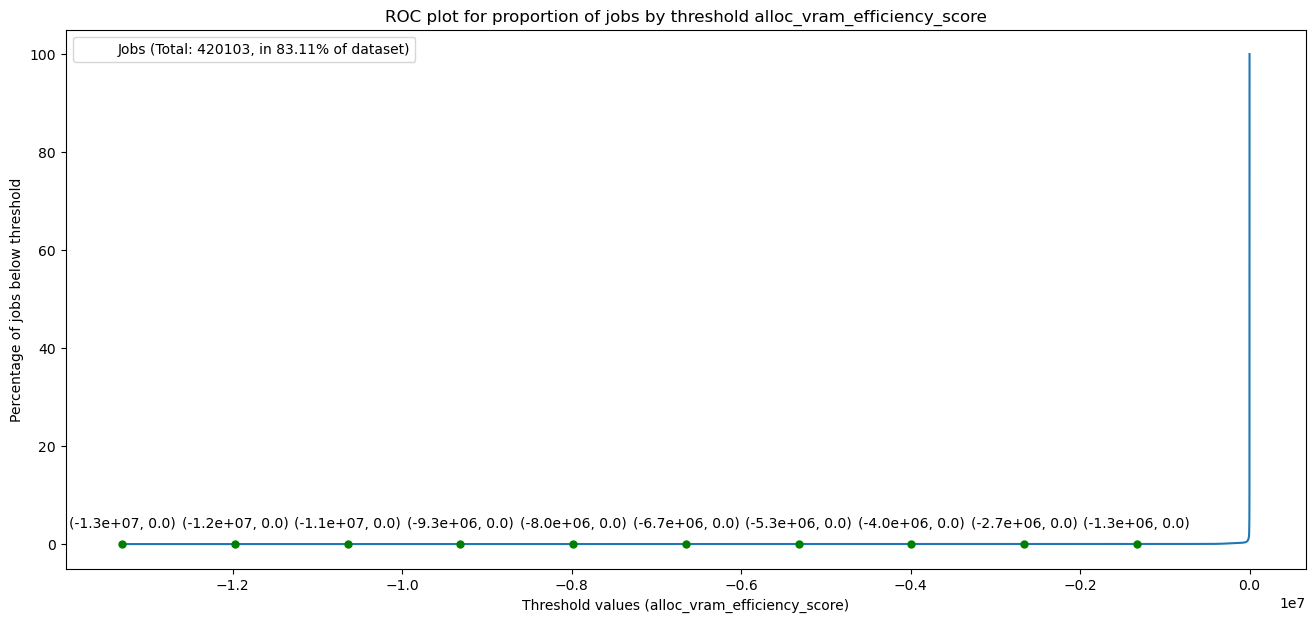

In [142]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=1000,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threhold metric: Job_hour & vram_hour (For number of jobs only) ###

In [108]:
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].min())

5.432701966246195
28.899838429859578
3072.2844444444445
0.16666666666666666


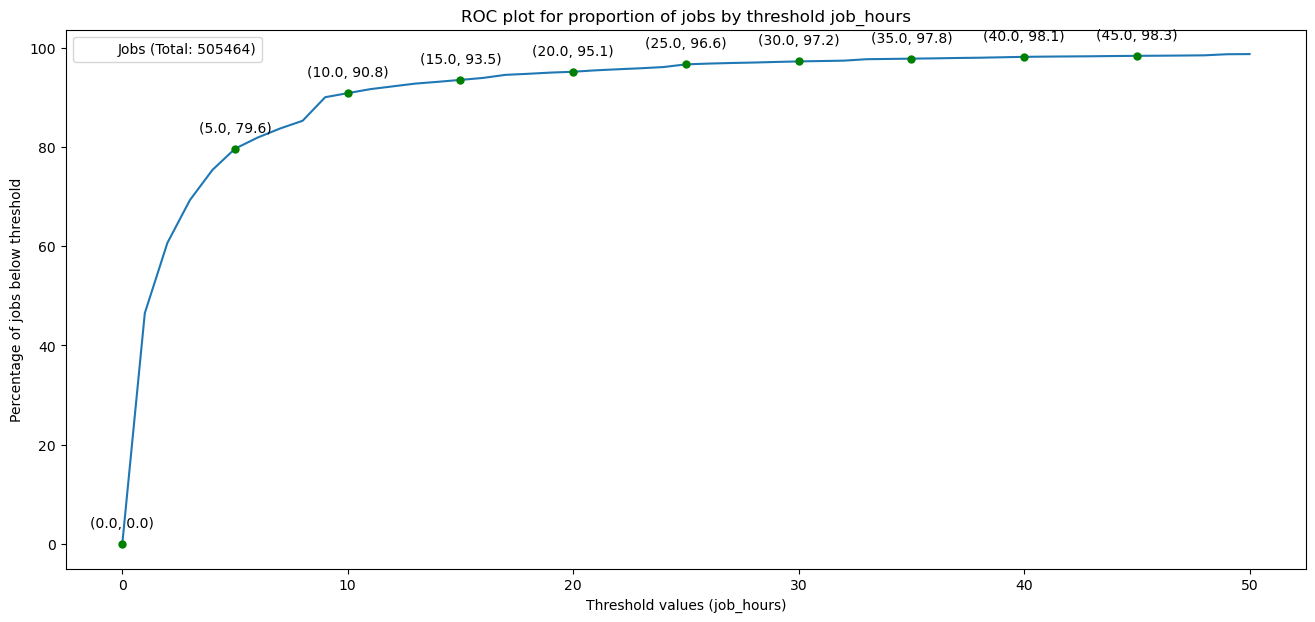

In [109]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.JOB_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=50,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [110]:
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].min())

494.6748326103452
8328.15094569086
2162888.248888889
1.8333333333333333


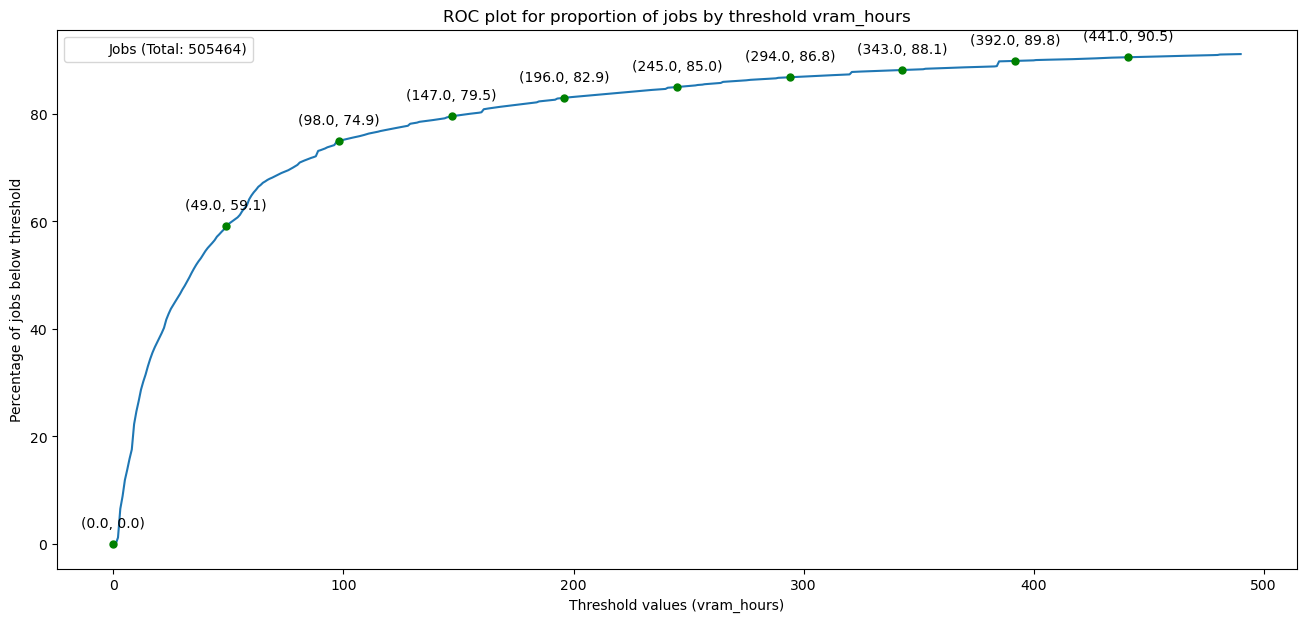

In [111]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=490,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion metric : User ###

In [112]:
null_alloc_vram_efficiency_score = roc_instance.jobs_with_efficiency_metrics[
    roc_instance.jobs_with_efficiency_metrics["alloc_vram_efficiency"].isna()
]

print(
    null_alloc_vram_efficiency_score[
        ["used_vram_gib", "allocated_vram", "alloc_vram_efficiency", "Partition", "GPUType"]
    ]
)

Empty DataFrame
Columns: [used_vram_gib, allocated_vram, alloc_vram_efficiency, Partition, GPUType]
Index: []


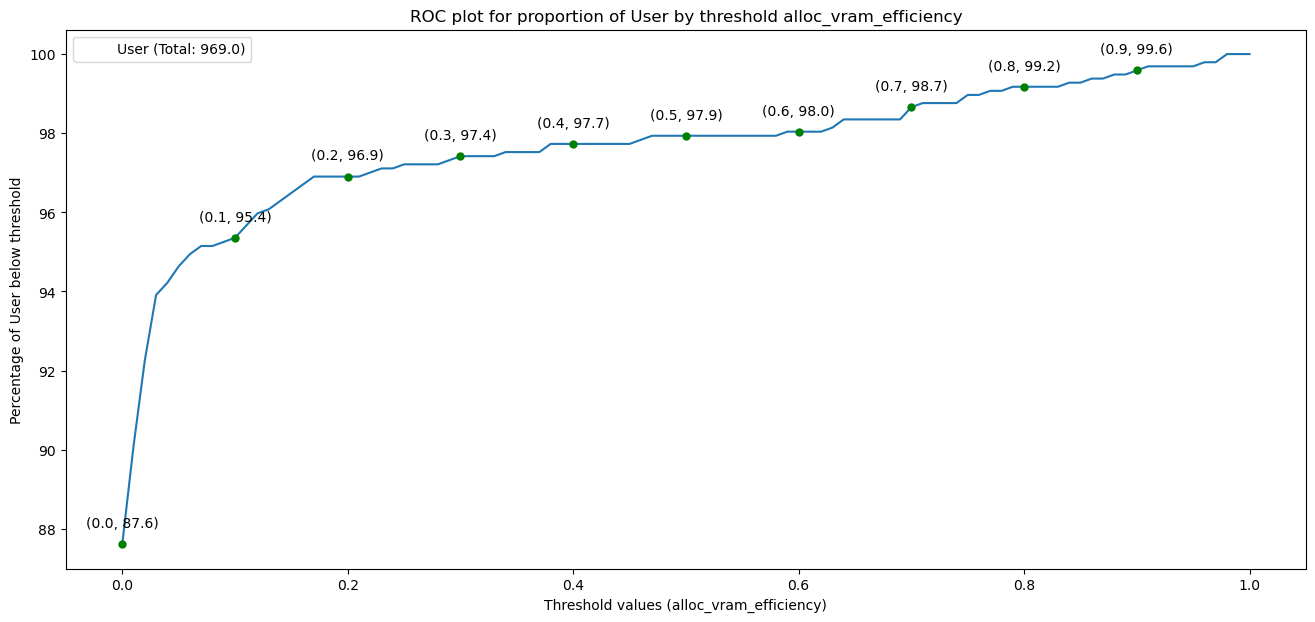

In [113]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

In [114]:
user_with_all_vram_score_null = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
user_with_all_vram_score_null

np.int64(524)

Filtered out 379778 invalid records based on vram_constraint_efficiency column.


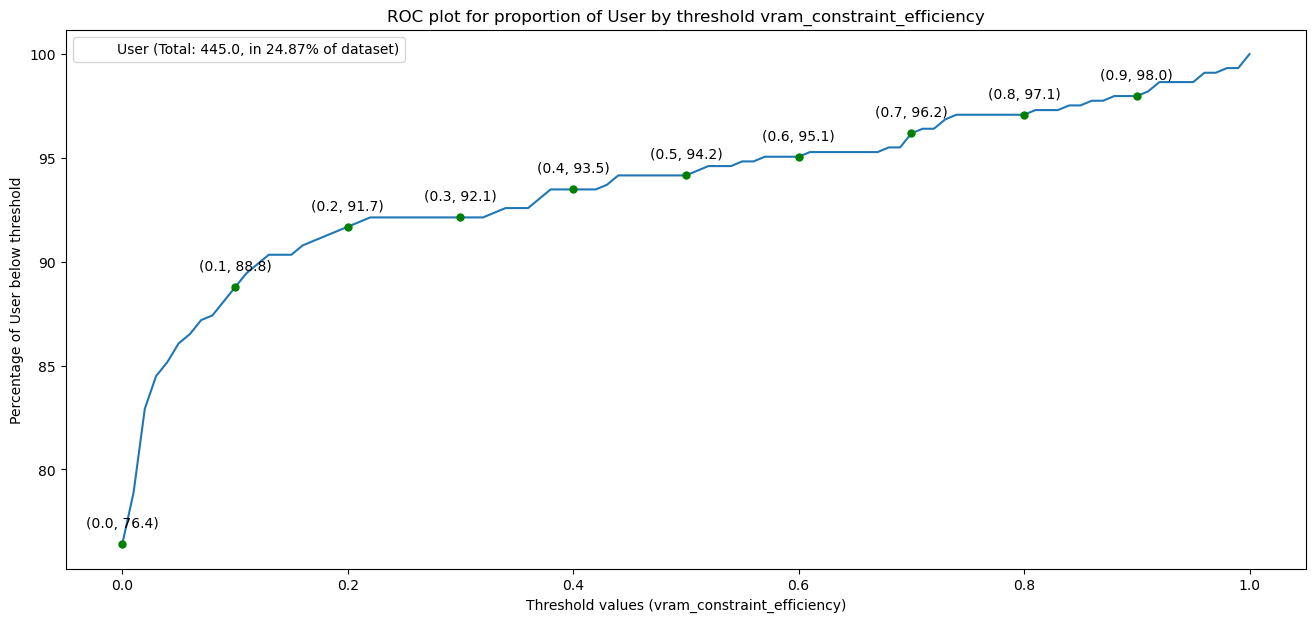

In [115]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

Filtered out 85361 invalid records based on alloc_vram_efficiency_score column.


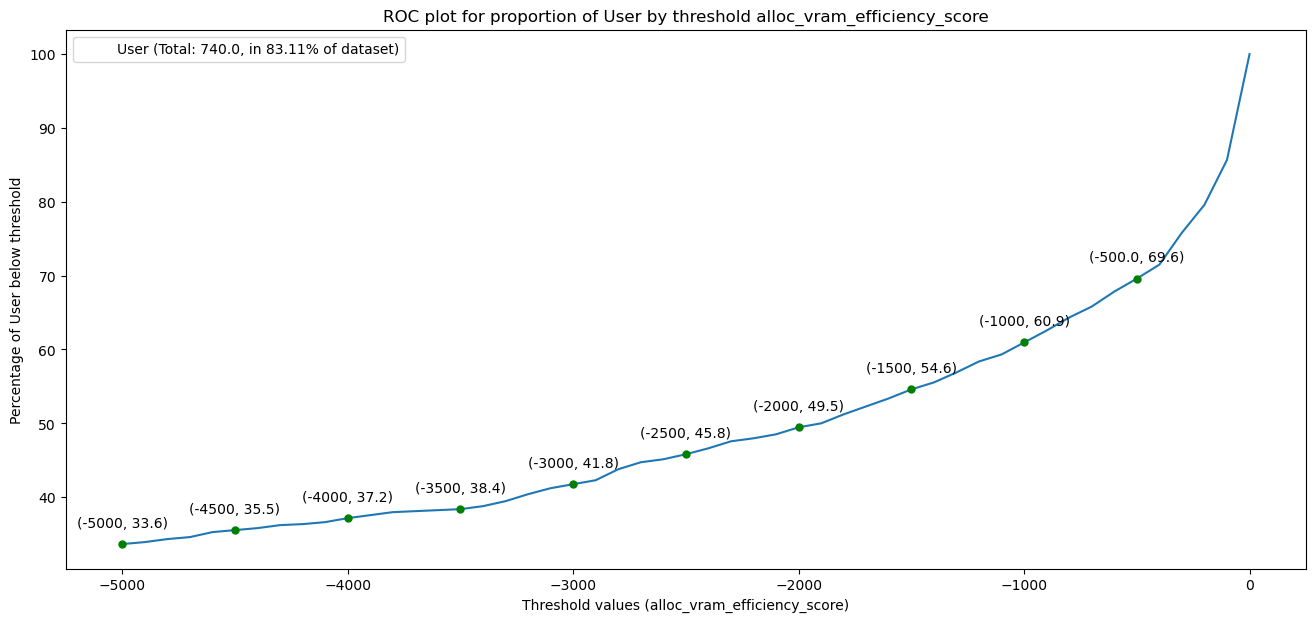

In [116]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=100,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion Metrics: PI_GROUP ###

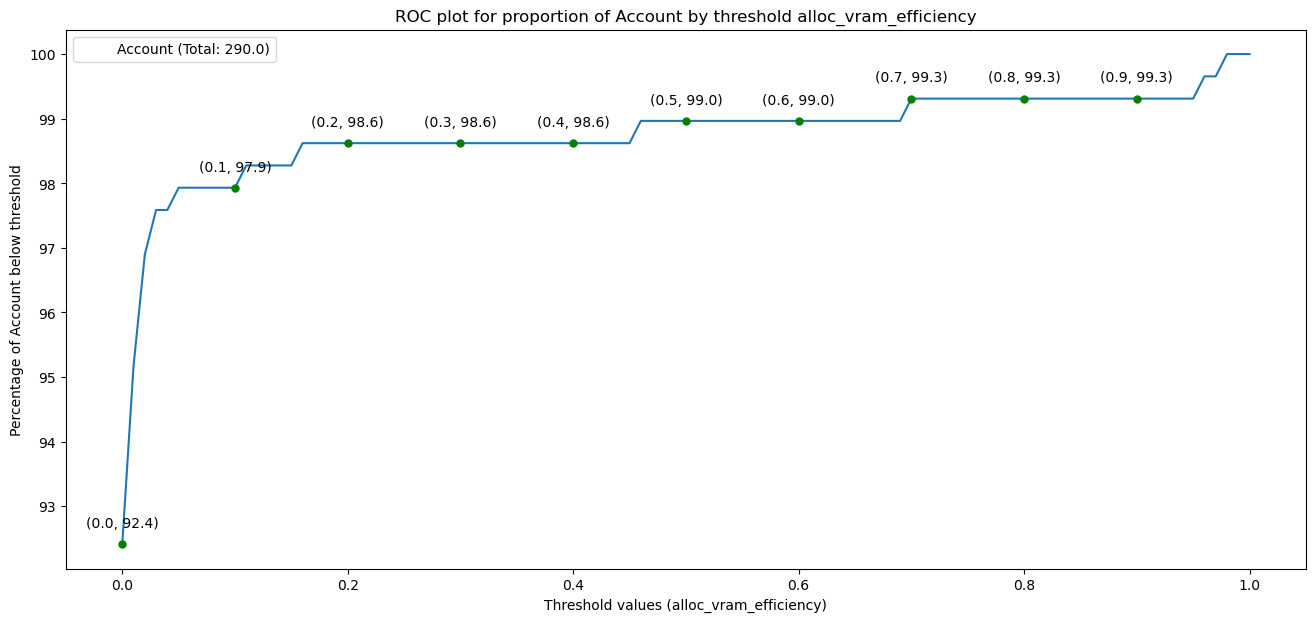

In [117]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [118]:
temp = (
    roc_instance.jobs_with_efficiency_metrics.groupby("Account", observed=True)["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
temp

np.int64(140)

Filtered out 379778 invalid records based on vram_constraint_efficiency column.


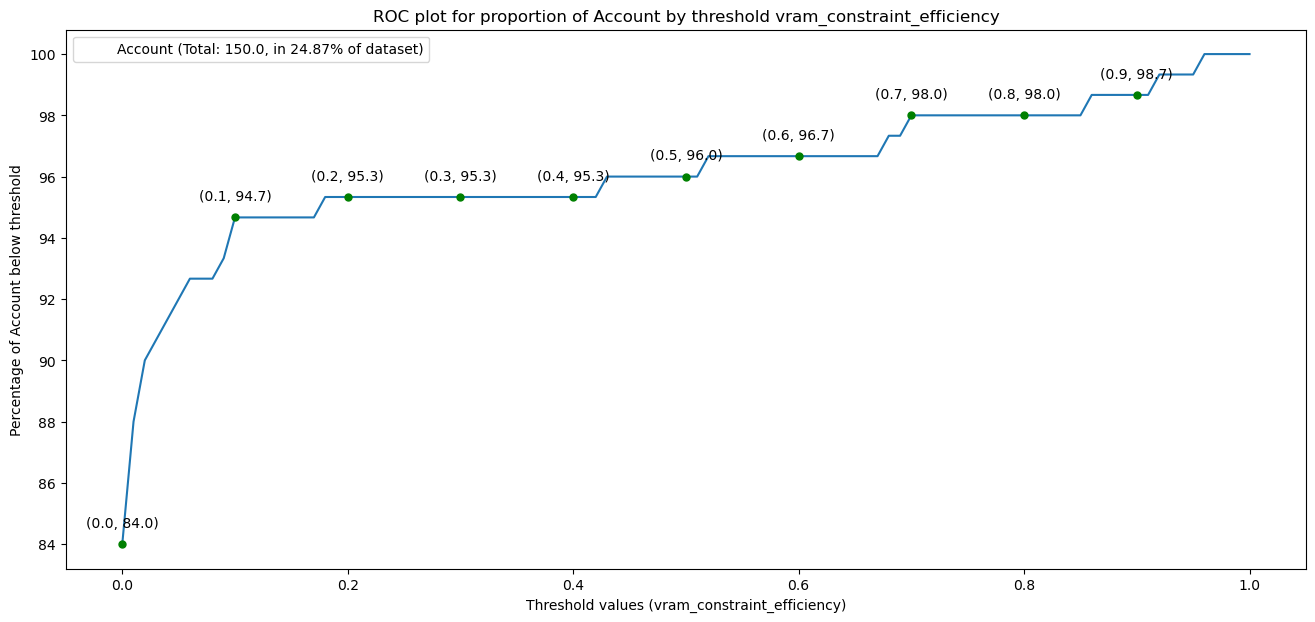

In [119]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

Filtered out 85361 invalid records based on alloc_vram_efficiency_score column.


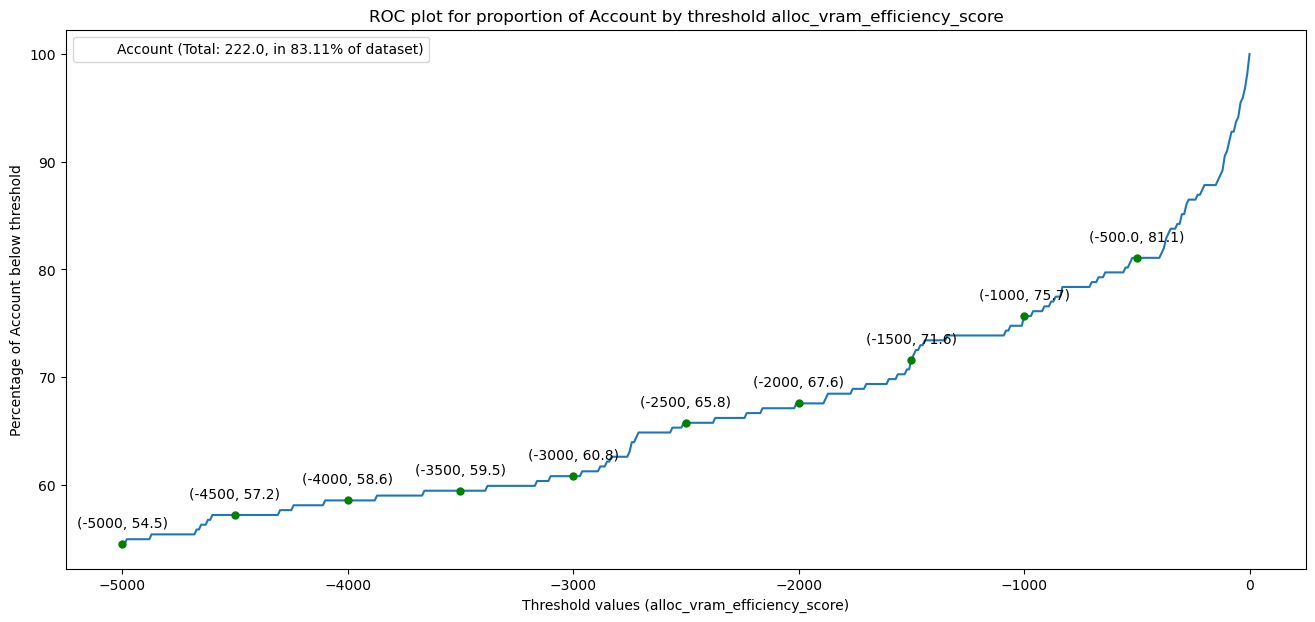

In [120]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion Metrics: VRAM_HOURS ###

Filtered out 379778 invalid records based on vram_constraint_efficiency column.


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for proportion of vram_hours by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

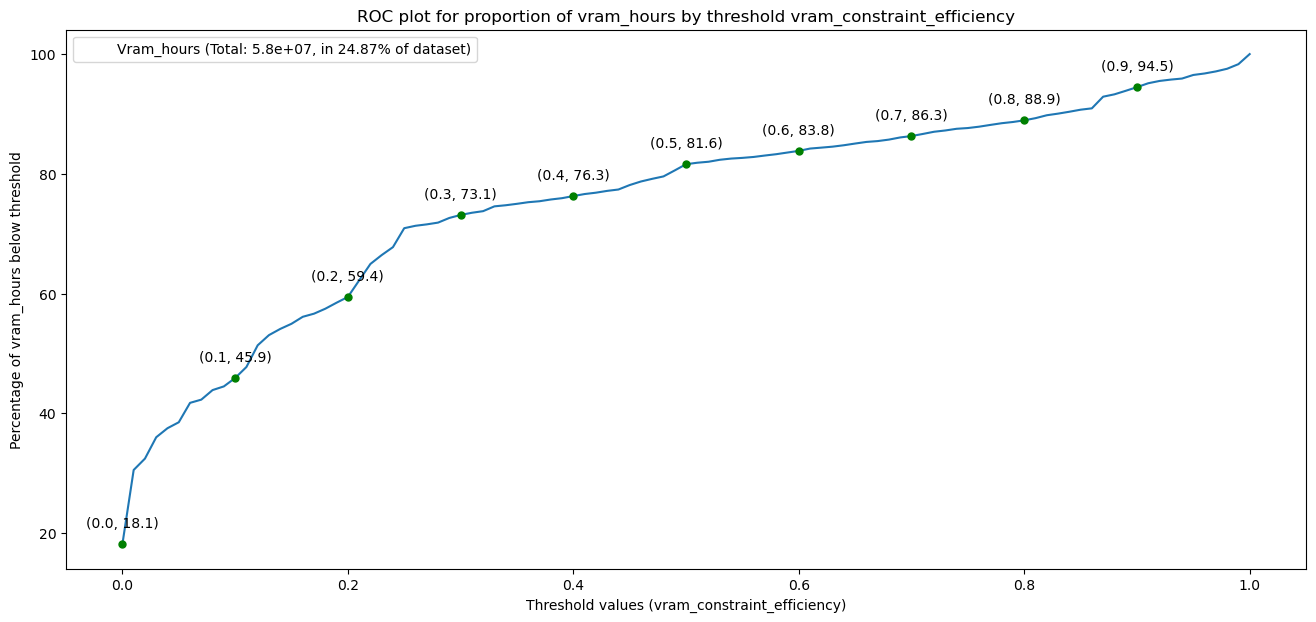

In [121]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for proportion of vram_hours by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

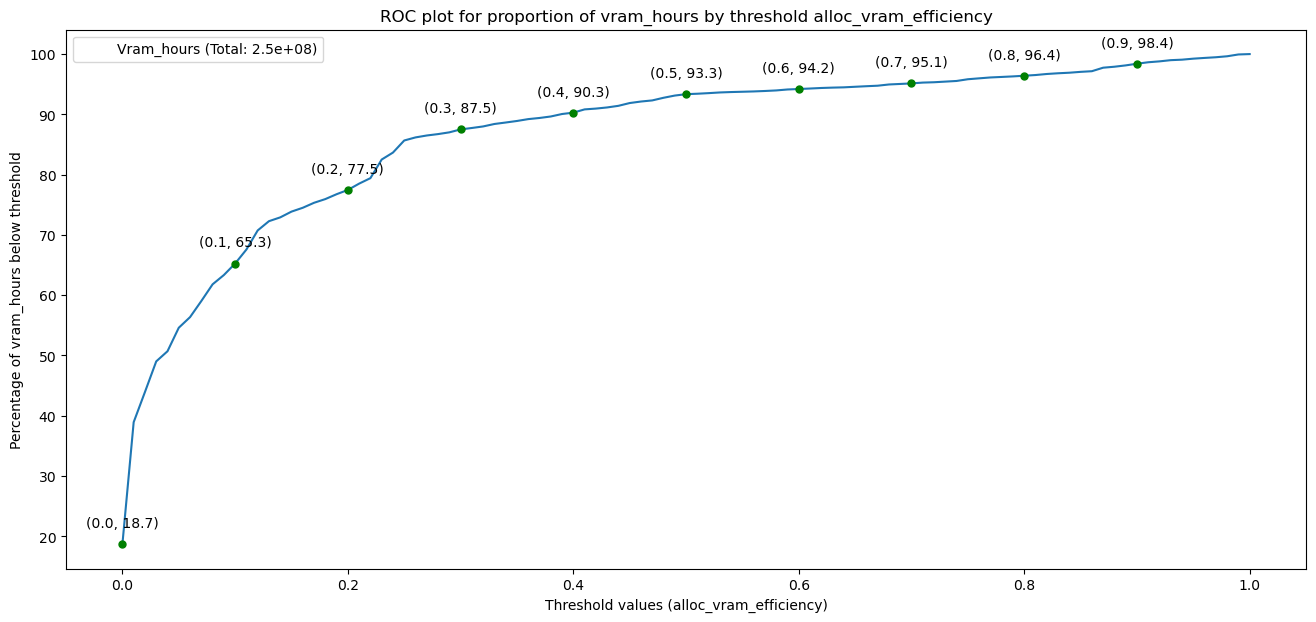

In [122]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


Filtered out 85361 invalid records based on alloc_vram_efficiency_score column.
Setting min_threshold to -13304603.139441624 based on data.


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for proportion of vram_hours by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Percentage of vram_hours below threshold'>])

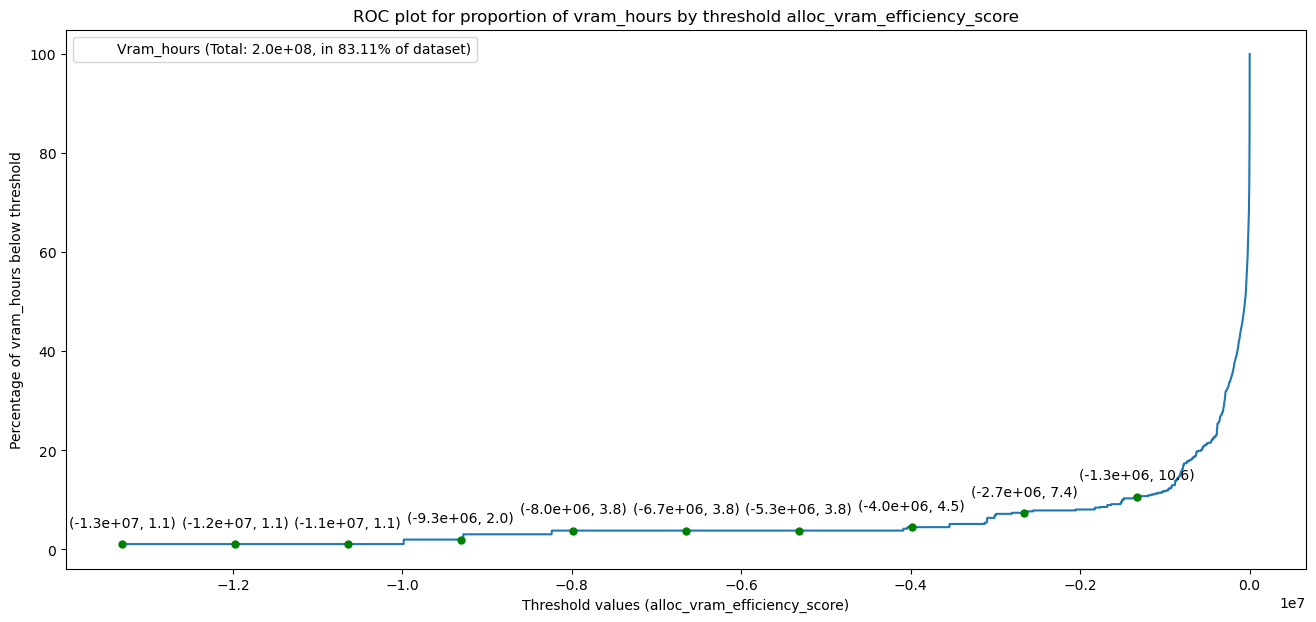

In [123]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    # min_threshold=-200000.0,
    threshold_step=1000,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


## Multiple line plot by user ###

#### Inspect 6 users who submitted the highest number of jobs ####

In [124]:
top_user_with_job_count = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), user_job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
print(top_user_with_job_count)

                     User  job_count  user_job_hours
216   dosterman_umass_edu      18824     4642.373889
888  wschwarzer_umass_edu      20440       33216.805
221  dshivashok_umass_edu      25732    19653.559444
616      pchien_umass_edu      29740       24954.775
734  shanlongli_umass_edu      35686     111851.9875
698    rvmathew_umass_edu      39548   126898.831667


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of jobs below threshold'>])

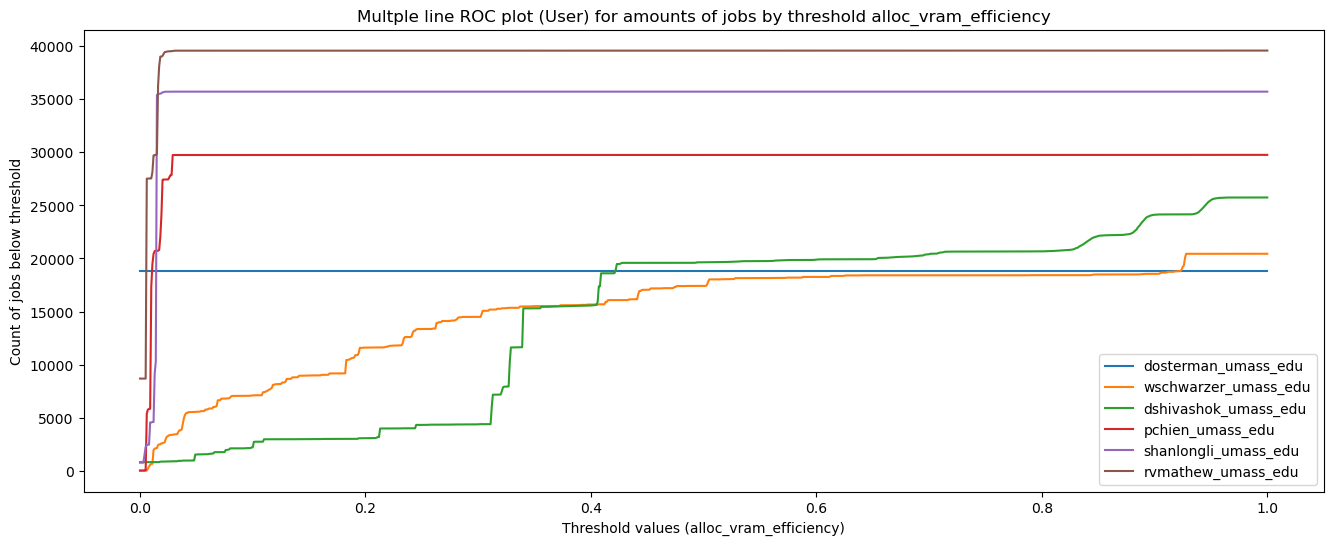

In [125]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 85361


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of jobs below threshold'>])

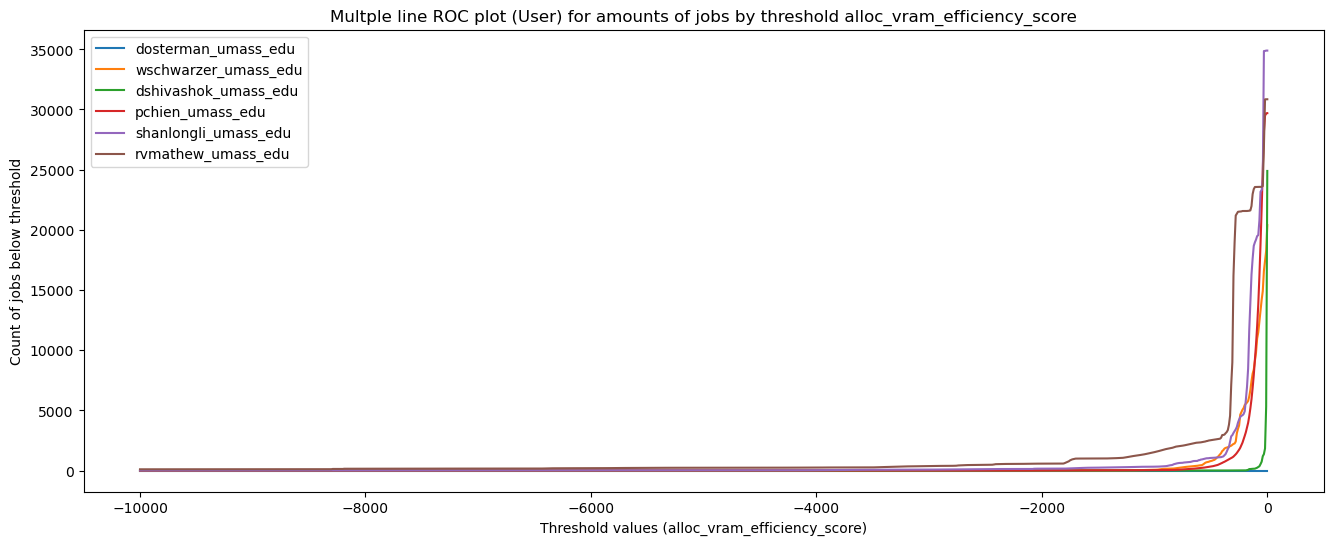

In [126]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=10,
    plot_percentage=False,
)

Amount of entries whose vram_constraint_efficiency is null: 379778


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of jobs below threshold'>])

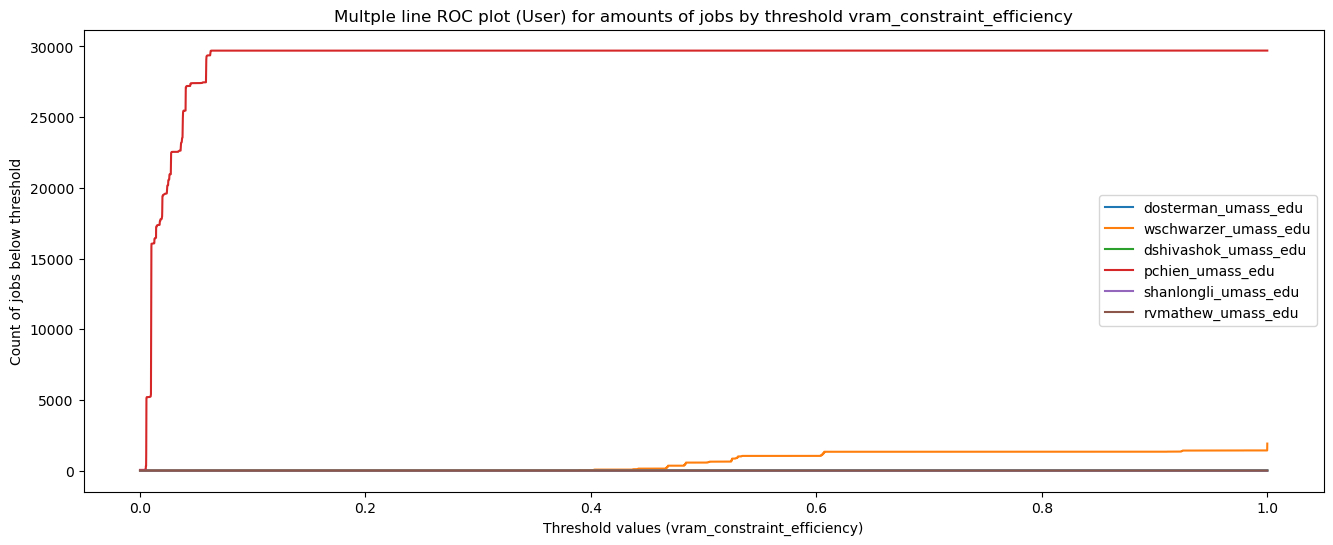

In [127]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    # plot_object_list=['dosterman_umass_edu'],
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    plot_percentage=False,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.0001,
)

In [128]:
# Inspect an outliner
cur_df = roc_instance.jobs_with_efficiency_metrics.copy()
filtered = cur_df[cur_df["User"] == "dosterman_umass_edu"].copy()
group = (
    filtered.groupby("User")
    .agg(
        job_count=("JobID", "count"),
        job_hours=("job_hours", "sum"),
        vram_efficiency_score=(JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY.value, "sum"),
        allocated_vram=("allocated_vram", "sum"),
        used_vram=("used_vram_gib", "sum"),
    )
    .reset_index()
)
print(group)

                  User  job_count    job_hours  vram_efficiency_score  \
0  dosterman_umass_edu      18824  4642.373889                    0.0   

   allocated_vram  used_vram  
0          261081        0.0  


#### Inspect the 6 users with highest number of job_hours ####

In [129]:
top_user_by_job_hour = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_hours")
    .tail(6)
)
print(top_user_by_job_hour)

                      User  job_count      job_hours
28   achyut_subedi_uri_edu        427   65195.026111
952         zhangl_uri_edu        767  106334.252778
7       aaronsun_umass_edu       8123  107402.157222
734   shanlongli_umass_edu      35686    111851.9875
698     rvmathew_umass_edu      39548  126898.831667
274        gkhanna_uri_edu       2856      167303.68


Amount of entries whose vram_constraint_efficiency is null: 379778


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of job_hours below threshold'>])

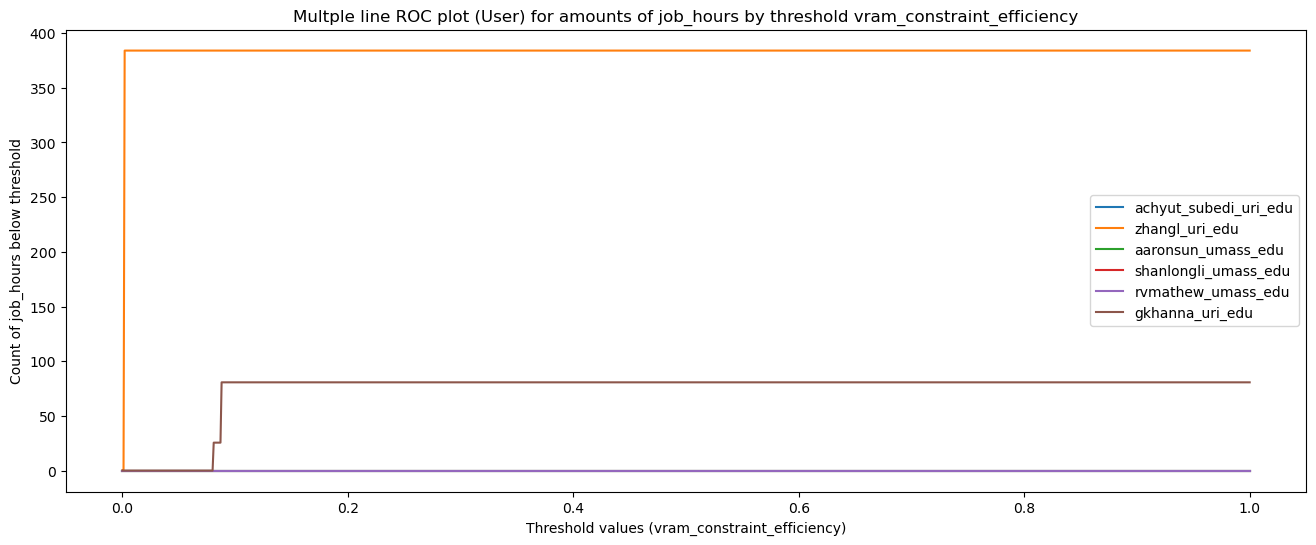

In [130]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of job_hours below threshold'>])

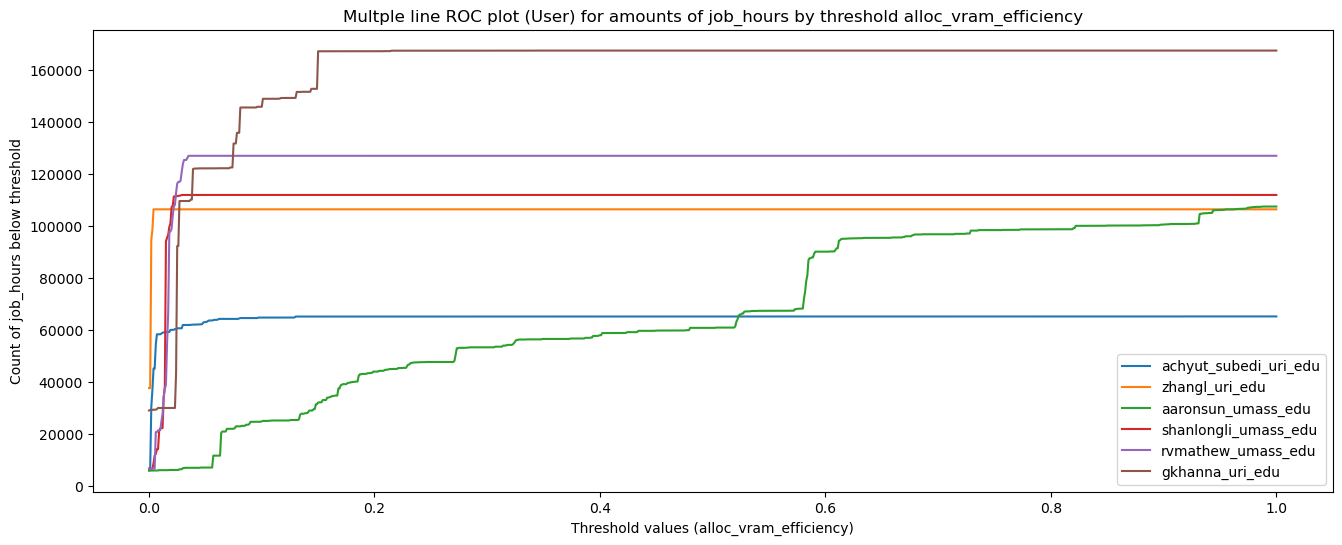

In [131]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

### Multiple plot ROC by PI Group ###

In [132]:
# from src.analysis.roc_plot import ROCVisualizer

# roc_instance = ROCVisualizer(db_path="../data/slurm_data.db")

In [133]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

cur_df = roc_instance.jobs_with_efficiency_metrics
top_pi_group_job_counts = (
    cur_df.groupby(ProportionMetricsEnum.PI_GROUP.value)
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
top_pi_group_job_counts

/var/folders/fk/pzwkjjt962zdq9cqb2t9lz7m0000gn/T/ipykernel_76311/2120321704.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur_df.groupby(ProportionMetricsEnum.PI_GROUP.value)


,Account,job_count,job_hours
37,pi_shertel_umass_edu,18887,4684.625833
213,pi_sunghoonlee_umass_edu,24136,85208.919722
230,pi_ekalogerakis_umass_edu,32632,40582.151111
200,pi_pchien_umass_edu,35015,28804.649167
130,pi_grason_umass_edu,39548,126898.831667
76,pi_jianhanc_umass_edu,40153,151511.785833


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of jobs by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of jobs below threshold'>])

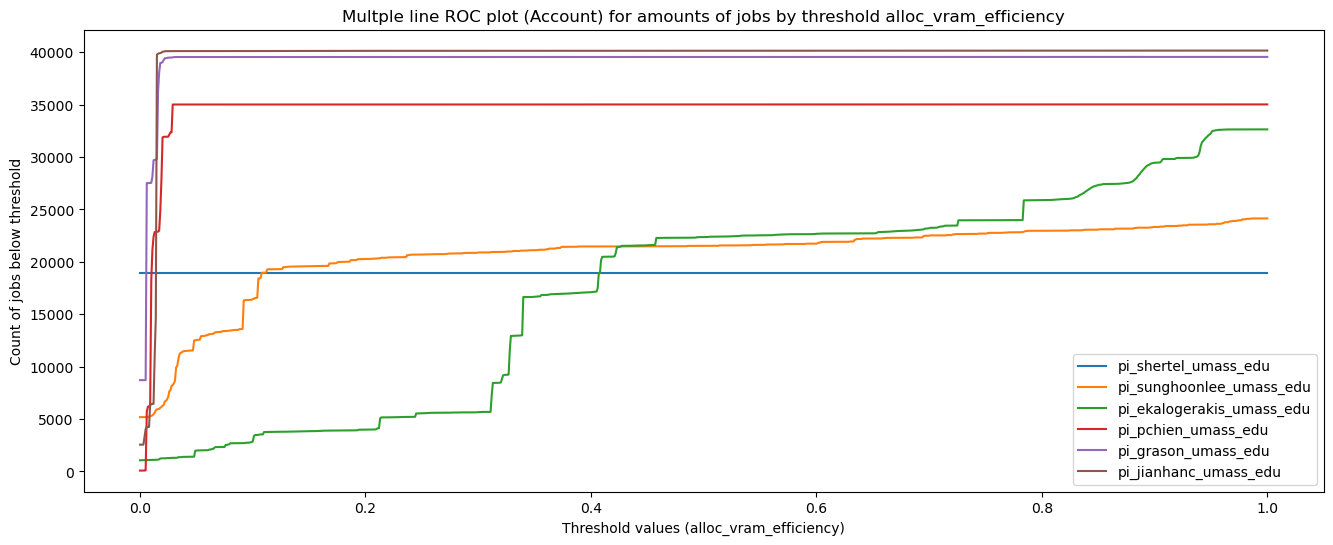

In [134]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUP.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUP,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 85361


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of jobs by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of jobs below threshold'>])

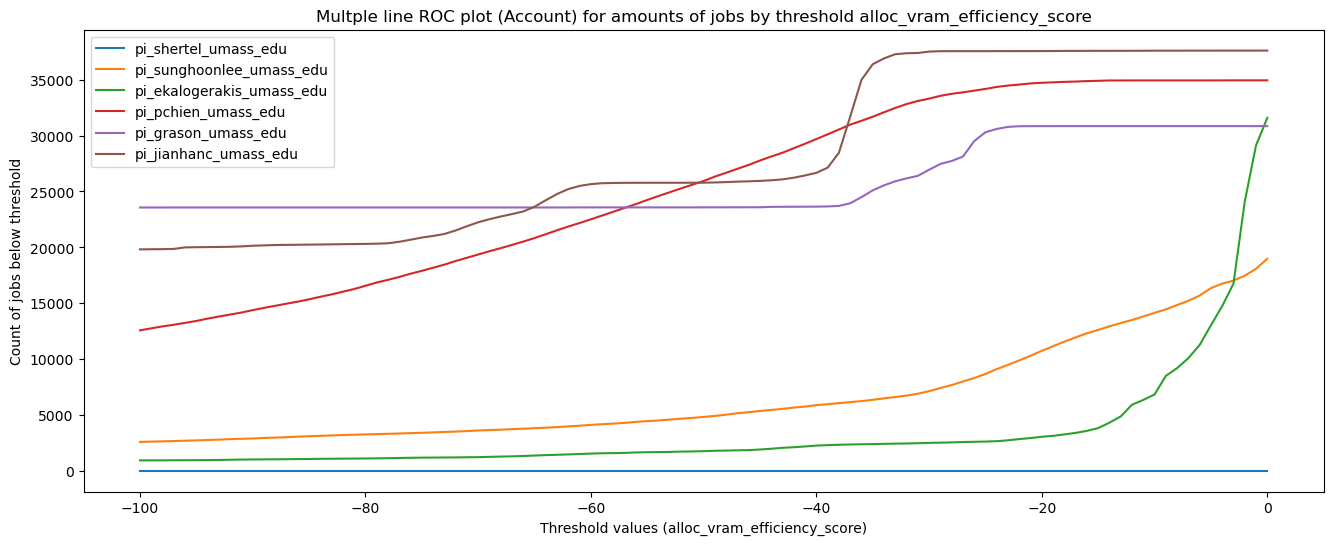

In [135]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUP.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUP,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    max_threshold=0.0,
    min_threshold=-100.0,
    threshold_step=1.0,
    plot_percentage=False,
)